# WISCONSIN CANCER CLASSIFICATION STUDY

## INTRODUCTION

This is a well-known dataset on predicting cancer. It involves the analysis of tumours. A tumour can be benign (not cancerous) or malignant (cancerous). Using various geometrical measurements of actual tumours, the objective is to determine whether or not a tumour is benign or malignant.

The purpose of this question is to find the best model for predicting malignancy correctly. The data is provided by Sklearn using

from sklearn.datasets import load_breast_cancer

Some of the data fields are differently scaled values. In the following we are to 

1 - Load the data into a Pandas dataframe

2 - Examine the dataframe for missing data and decide how to treat these

3 - Try to see which features have the best explanatory power. 

4 - Also, deal with categorical data and use feature standardization

5 - Choose metrics for model evaluation

6 - Use the following models - Logistic Regression, KNN (test for different values of K), Decision Tree and SVM Classifier

7 - Use training and testing to identify the best model

8 - Write a summary explaining your results.

# I. Loading and setting the data

## A. Setting the Pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = np.c_[cancer.data, cancer.target]
df = pd.DataFrame(data)

y = cancer.target
X = cancer.data


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension', 'Diagnosis' ]

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## B. Dealing with missing data

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64

We can see that there is no missing data

# II. Features selection

As we have around 30 features, we can't plot all our features between themselves and try to find clear scatterplots. 
Instead of that, in order to determine the features that have the best explanatory powers, I will run a regression between each one of our feature and our targets (the 'y' vector), and rank them by their accuracy scores.
But first, let's have a look at the graphs. 

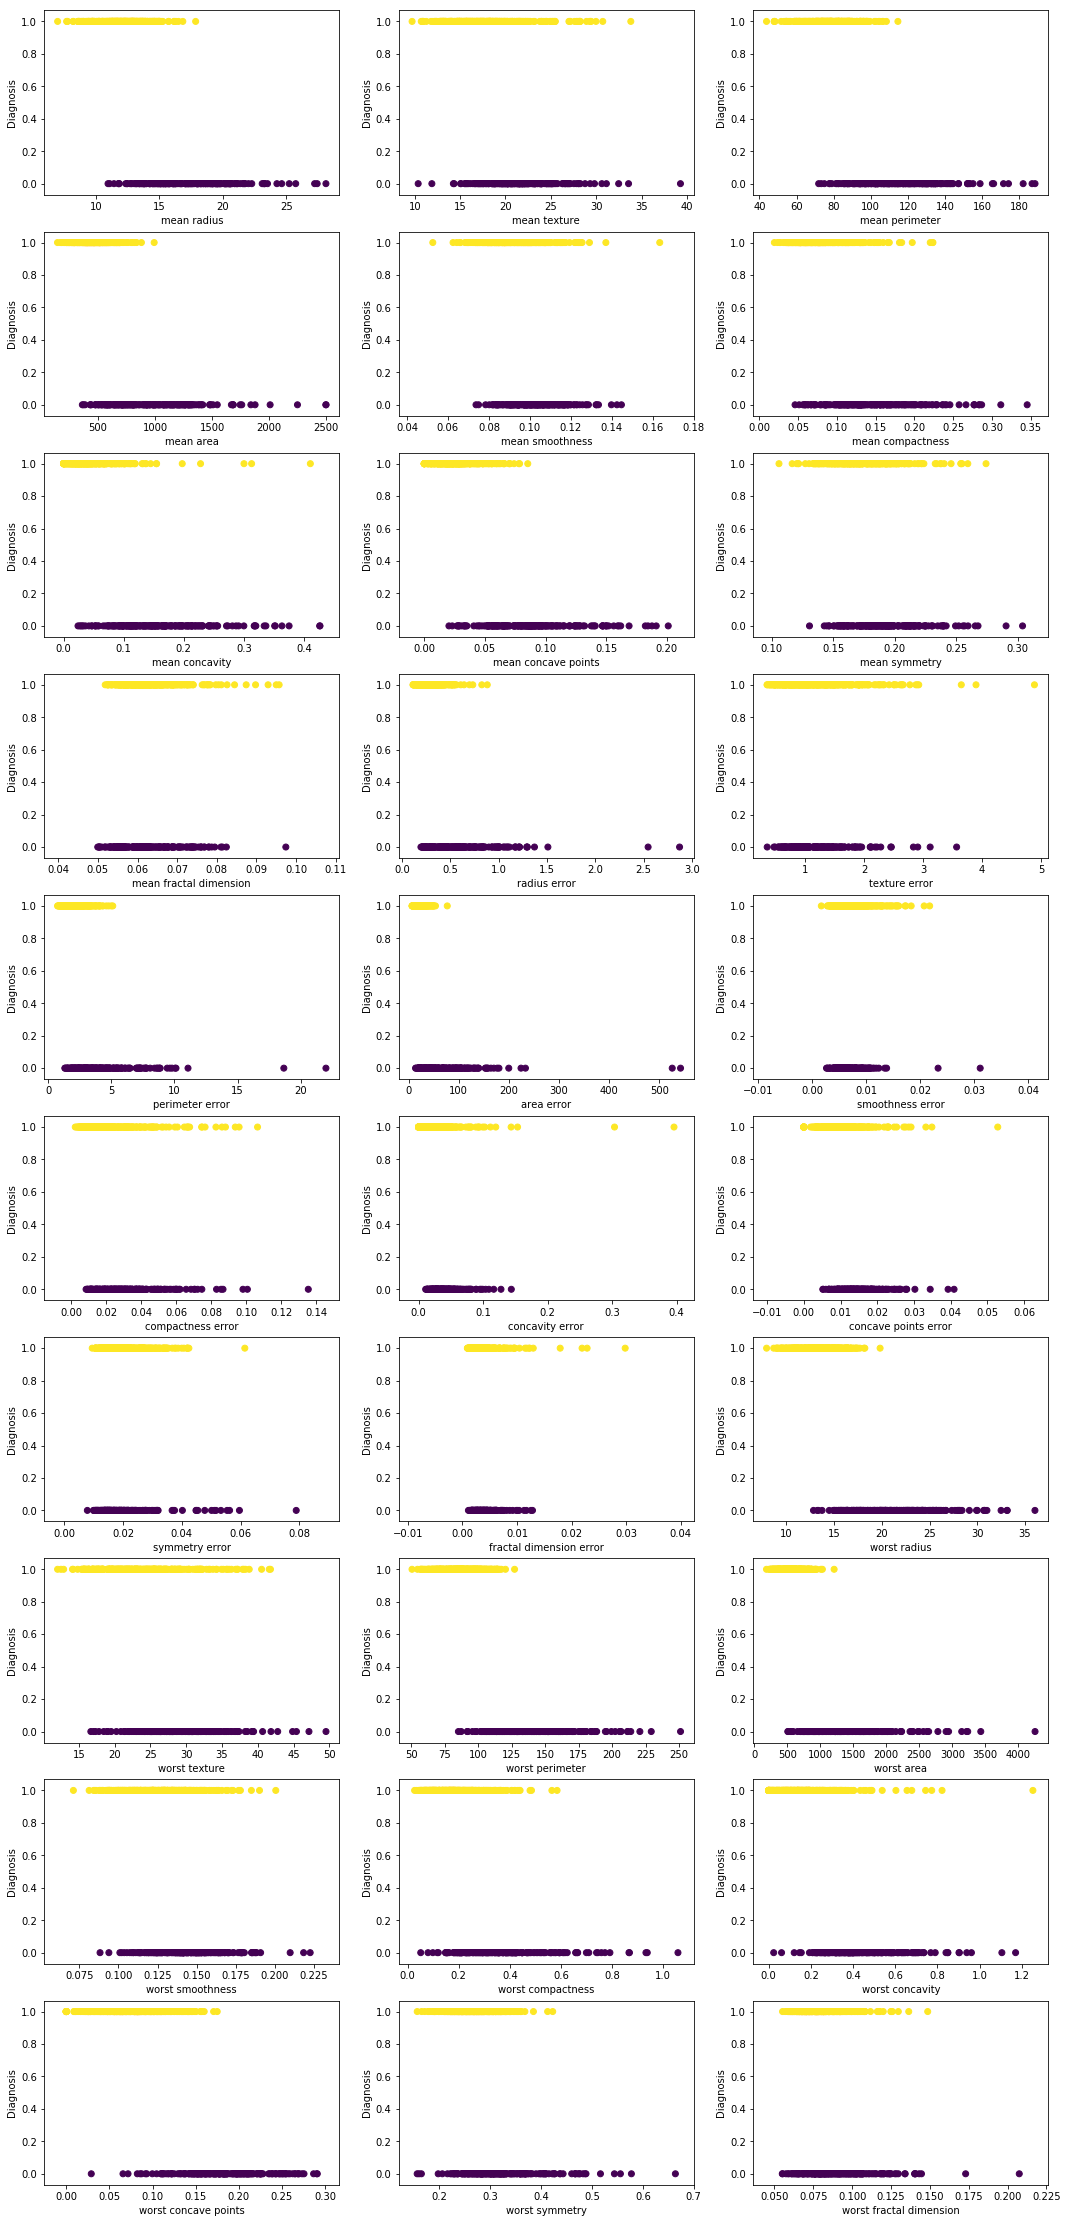

In [7]:
try:
    plt_idx = 0
    plt.figure(figsize=(18, 40))
    for n in cancer.feature_names:
        plt.subplot(10,3,plt_idx + 1)
        plt.scatter(df[n], cancer.target, c = y)
        plt_idx = plt_idx + 1 
        plt.xlabel(n)
        plt.ylabel('Diagnosis')
        
except:
    pass

Now that we have a first idea of the explanatory power of the different features, let's determine them in a quantitative way.

In [8]:
#This code below calculates the accuracy scores of the linear regression for each different feature
from sklearn import linear_model
regr = linear_model.LinearRegression()

my_liste_of_scores = []
for n in cancer.feature_names:
    reshaped_vector = df[n].values.reshape(-1,1)
    regr.fit(reshaped_vector, y)
    my_liste_of_scores.append((regr.score(reshaped_vector, y)))
print(my_liste_of_scores)

[0.532941627421065, 0.17237883320755243, 0.5515075300111687, 0.5026580805393388, 0.1285652485624249, 0.35585242840152076, 0.4849168417725423, 0.6031290565112866, 0.1092292943696338, 0.0001648040430426434, 0.32164077072324315, 6.894533847512374e-05, 0.30929248201326487, 0.3005626462125295, 0.004491145673990005, 0.08584855713040218, 0.06437879414468684, 0.16649854528872676, 4.253329963621599e-05, 0.006079697873680567, 0.6028804702945147, 0.20876018820035458, 0.612954546186532, 0.5384991818768817, 0.17763262911372202, 0.34927891713210346, 0.43508562962334385, 0.6297470235614584, 0.17330095341144447, 0.1048931946268169]


/Users/Jeremymeyer/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Let's extract the highest scores and the features associated with them:

In [9]:
liste_of_max = []
our_liste = [n for n in my_liste_of_scores]
best_scores = []

for n in range(0, 5):
    best_scores.append(max(our_liste))
    liste_of_max.append(cancer.feature_names[our_liste.index(max(our_liste))])
    our_liste[our_liste.index(max(our_liste))] = 0 

print(liste_of_max)
print(best_scores)
    

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']
[0.6297470235614584, 0.612954546186532, 0.6031290565112866, 0.6028804702945147, 0.5515075300111687]


Then, the 5 best explanatory features are "worst concave points", "worst perimeter", "mean concave points", "worst radius" and "mean perimeter".

Let's plot these 5 features between themselves.

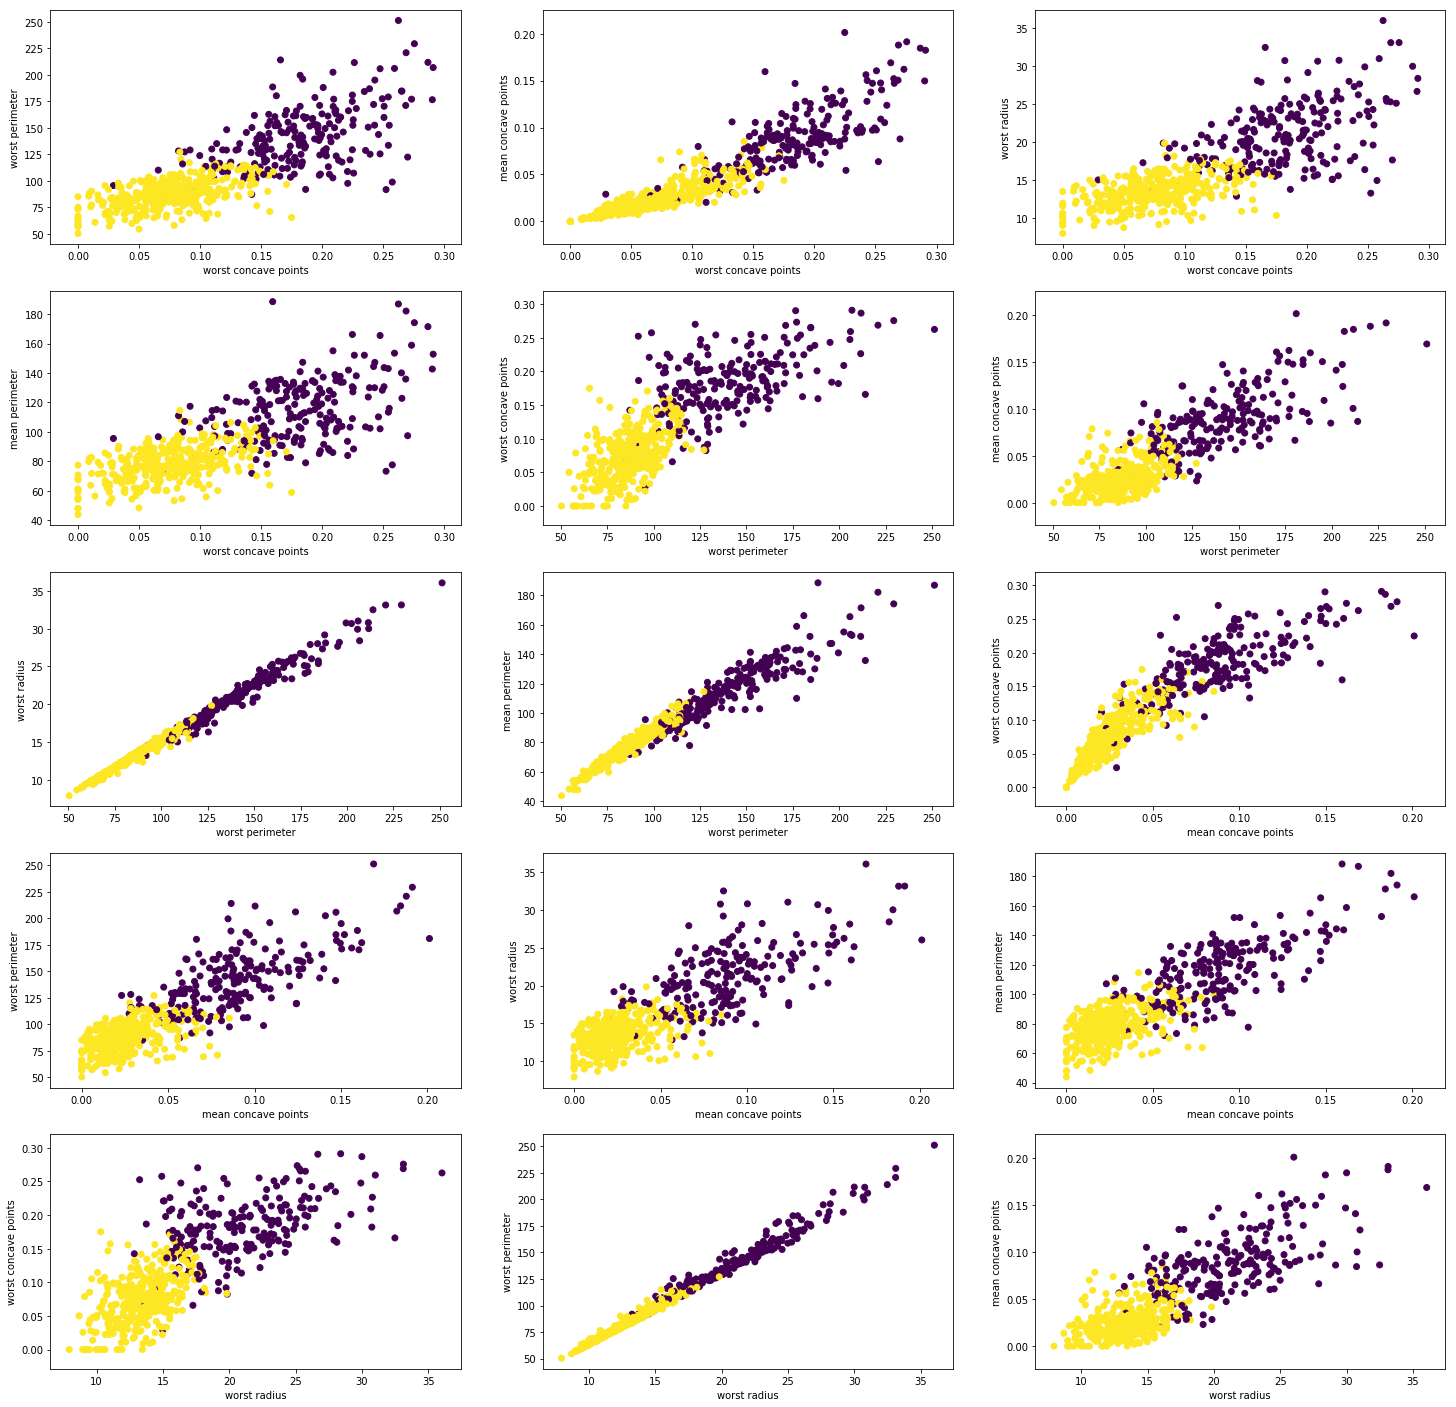

In [10]:
try:
    plt_idx = 0
    plt.figure(figsize=(25, 25))
    for n in liste_of_max:
        for m in liste_of_max:
            if n != m:
                plt.subplot(5,3,plt_idx + 1)
                plt.scatter(df[n], df[m], c = y)
                plt_idx = plt_idx + 1 
                plt.xlabel(n)
                plt.ylabel(m)
except:
    pass
            

We then remark that the scatterplots are quite clear and show the features' strong explanatory powers.

# STANDARDIZATION OF THE DATA

In [11]:
#With this type of standardization, the mean is 0 and the standard deviation is 1. 
from sklearn.preprocessing import StandardScaler

X = cancer.data
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns = cancer.feature_names)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# III. KNN MODEL

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.9707602339181286


In [14]:
#This code find the optimal number of neighbors for our model, considering a potential number of neighbors between 1 and 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
our_liste = []
for n in range(1, 50):
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    our_liste.append(knn.score(X_test, y_test))
print("The number of optimal neighbors is " + str(our_liste.index(max(our_liste)) + 1))




The number of optimal neighbors is 4


What if we put the parameter "distance" in our model ? 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
our_liste = []
for n in range(1, 50):
    knn = KNeighborsClassifier(n, 'distance')
    knn.fit(X_train, y_train)
    our_liste.append(knn.score(X_test, y_test))
print("With the parameter Distance, the number of optimal neighbors is " + str(our_liste.index(max(our_liste)) + 1))

With the parameter Distance, the number of optimal neighbors is 3


In [16]:
#Our previous code showed that the optimal number of neighbors is 4
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [17]:
X_prediction = knn.predict(X_test)
print(X_prediction - y_test)
print()
print("The f1 score of the prediction is: " + str(f1_score(X_prediction, y_test)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

The f1 score of the prediction is: 0.9849246231155778


In [18]:
#We add these informations for the summary at the end of the report
liste_of_f1_scores = []
model_names = []
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append('KNN 4')

What is the f1 score of the model with the parameter "distance" ? 

In [19]:
knn = KNeighborsClassifier(3, 'distance')
knn.fit(X_train, y_train)
X_prediction = knn.predict(X_test)
print(X_prediction - y_test)
print()
print("With the parameter distance, The f1 score of the prediction is: " + str(f1_score(X_prediction, y_test)))
print()
print("The model with the distance parameter is then less efficient than the classical one")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

With the parameter distance, The f1 score of the prediction is: 0.9751243781094527

The model with the distance parameter is then less efficient than the classical one


We know that if the tumor is benign, then the index is 1, and 0 otherwise.
Then, if we refer ourselves to the X_prediction vector, we can infer that:
- 0 means that the prediction was true 
- 1 means that the model predicted a tumor to be benign, whereas it was malignant (False Negative)
- -1 means that the model prediced a tumor to be malignant, whereas it was benign (False Positive)

In [20]:
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append('KNN 3 and distance')

In [21]:
cm = confusion_matrix(X_prediction, y_test)
print(cm)

[[68  0]
 [ 5 98]]


The confusion matrix informs us that there are 5 False Negative, 0 False Positive, 68 True Positives and 98 True Negatives.

In [22]:
print(classification_report(X_prediction, y_test))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        68
          1       1.00      0.95      0.98       103

avg / total       0.97      0.97      0.97       171



The classification report informs us that:
    - 93% of the malignant tumors have been correctly diagnosed 
    - 100% of the benign tumors have been correctly diagnosed
    - 100% is the percentage of the malignant tumors that have been detected over all those diagnosed
    - 95% is the percentage of the benign tumors that have been detecter over all those diagnosed

Let's plot a few graph to check our model:

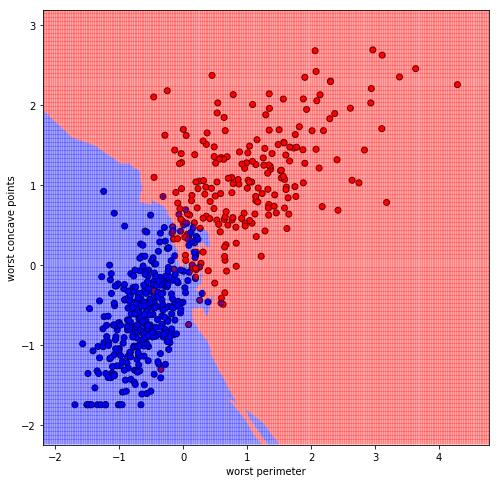

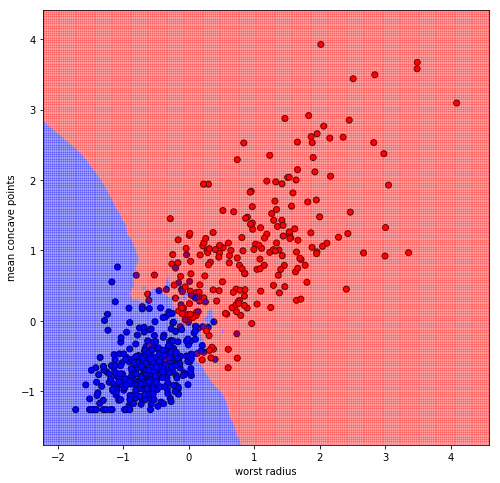

In [23]:
import HelpfulFunctions as hp

featureX = 'worst perimeter'
featureY = 'worst concave points'

X_new = df[[featureX,featureY]]

clf = KNeighborsClassifier(4)
clf.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,clf,plt)

########

featureX = 'worst radius'
featureY = 'mean concave points'

X_new = df[[featureX,featureY]]

clf = KNeighborsClassifier(4)
clf.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,clf,plt)


# IV. LOGISTIC REGRESSION MODEL

As the logistic regression model is not as accurate as the others models (the model just divides the space into two parts with a straight line) such as KNN or Decision Trees, we can study the accuracy of the previsions for the in-sample data.
Indeed, making in-sample predictions for the others models would lead to a success rate of 100% as these models are very well fitted to the in-sample data, compared to the logistic regression model which is not so good at making in-sample predictions.

## A. In-sample data test 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print(logreg.score(X, y))

0.9876977152899824


In [26]:
X_prediction = logreg.predict(X)

In [27]:
print(X_prediction - y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

We know that if the tumor is benign, then the index is 1, and 0 otherwise.
Then, if we refer ourselves to the X_prediction vector, we can infer that:
- 0 means that the prediction was true 
- 1 means that the model predicted a tumor to be benign, whereas it was malignant (False Negative)
- -1 means that the model prediced a tumor to be malignant, whereas it was benign (False Positive)

In [28]:
cm = confusion_matrix(X_prediction, y)
print(cm)

[[207   2]
 [  5 355]]


In [29]:
print(classification_report(X_prediction, y))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       209
          1       0.99      0.99      0.99       360

avg / total       0.99      0.99      0.99       569



We can interpret the confusion matrix and the classification report the same way as before

## B. Out-of-sample data test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.9707602339181286


In [31]:
X_prediction = logreg.predict(X_test)
print(X_prediction - y_test)
print()
print("The f1 score of the predictions is: " + str(f1_score(X_prediction, y_test)))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

The f1 score of the predictions is: 0.9751243781094527


In [32]:
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append("Logistic Regression")

In [33]:
cm = confusion_matrix(X_prediction, y_test)
print(cm)

[[68  0]
 [ 5 98]]


In [34]:
print(classification_report(X_prediction, y_test))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        68
          1       1.00      0.95      0.98       103

avg / total       0.97      0.97      0.97       171



From the confusion matrix and the classification report, we can draw the same kind of conclusions as the ones for the KNN model. 

Again, let's plot some graph: 

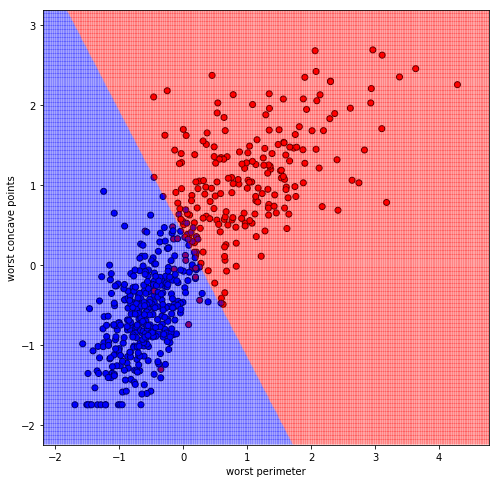

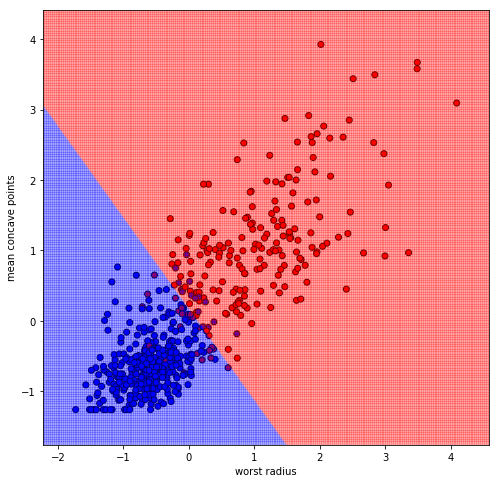

In [35]:
featureX = 'worst perimeter'
featureY = 'worst concave points'

X_new = df[[featureX,featureY]]

logreg.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,logreg,plt)

#######

featureX = 'worst radius'
featureY = 'mean concave points'

X_new = df[[featureX,featureY]]

logreg.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,logreg,plt)

According to the graph, our model seems to be quite good.

# V. DECISION TREE CLASSIFIER MODEL

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.9298245614035088


In [37]:
X_prediction = dtc.predict(X_test)
print(X_prediction - y_test)
print()
print("The f1 score of the predictions is: " + str(f1_score(X_prediction, y_test)))

[-1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  1 -1  0]

The f1 score of the predictions is: 0.9400000000000001


In [38]:
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append("Decision Tree")

In [39]:
cm = confusion_matrix(X_prediction, y_test)
print(cm)

[[65  4]
 [ 8 94]]


In [40]:
print(classification_report(X_prediction, y_test))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92        69
          1       0.96      0.92      0.94       102

avg / total       0.93      0.93      0.93       171



The code below helps us to find the optimal value for the parameter "max_depth". I did some MC Simulations in order to find the
average optimal value, as it changes from one test to another.

In [41]:
our_liste = []
optimal_index = 0
for i in range(1, 50):
    our_liste = []
    for n in range(1, 10):
        dtc = DecisionTreeClassifier(max_depth = n)
        dtc.fit(X_train, y_train)
        our_liste.append(dtc.score(X_test, y_test))
    optimal_index = our_liste.index(max(our_liste)) + optimal_index
    
print("The optimal depth is " + str(int(round(optimal_index / 50, 0))))

The optimal depth is 5


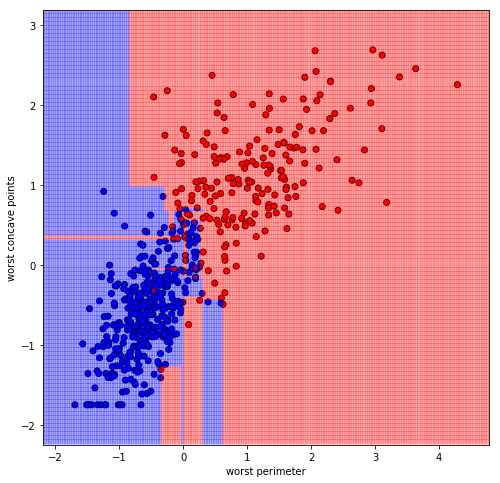

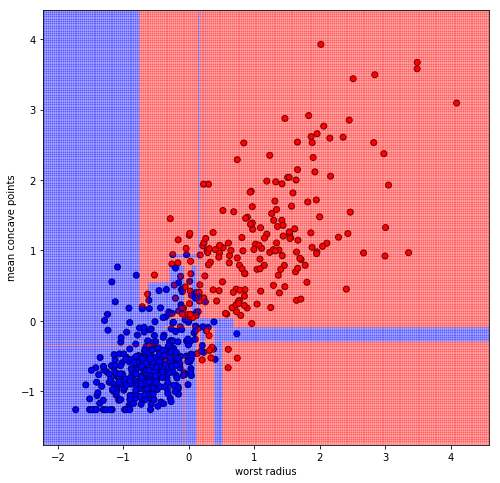

In [42]:
featureX = 'worst perimeter'
featureY = 'worst concave points'

X_new = df[[featureX,featureY]]

dtc.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,dtc,plt)

#######

featureX = 'worst radius'
featureY = 'mean concave points'

X_new = df[[featureX,featureY]]

dtc.fit(X_new, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X_new,y,dtc,plt)

# VI. SVM MODEL

## RADIAL SVM 

The SVM model, compared to the other ones, should be way more sensitive to the scale of the data. In order to check that, let's take our original data without any standardization. 

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.5730994152046783


We can notice that the efficiency of our model is very low. We can assume that it comes from the fact that if our data are not standardized, the SVM model is not working so well. Now, let's try to standardize our data before fitting our model.

In [44]:
#To standardize our data, we should have done as previously, with the sklearn library. Here is another method:
minimum_X = X.min(axis=0) 
maximum_X = X.max(axis=0)

X_scaled = (X - minimum_X) / (maximum_X - minimum_X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 999)

In [45]:
#Let's try to find out if the standardization changed something:

svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.9239766081871345


Now, we can notice that as long as we have standardized data, the SVM is a very good model for making predictions.

In [46]:
X_prediction = svm.predict(X_test)
print(X_prediction - y_test)
print()
print(f1_score(X_prediction, y_test))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

0.937799043062201


In [47]:
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append("Radial SVM")

In [48]:
cm = confusion_matrix(X_prediction, y_test)
print(cm)

[[60  0]
 [13 98]]


In [49]:
print(classification_report(X_prediction, y_test))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90        60
          1       1.00      0.88      0.94       111

avg / total       0.94      0.92      0.93       171



## POLYNOMIAL SVM

In [50]:
svm = SVC(kernel = 'poly')
svm.fit(X_train, y_train)

X_prediction = svm.predict(X_test)

print("The f1 score of the Polynomial SVM is: " + str(f1_score(X_prediction, y_test)))

The f1 score of the Polynomial SVM is: 0.7313432835820896


Then, the Polynomial SVM Model seems to be less efficient than the Radial SVM Model.

In [51]:
liste_of_f1_scores.append(f1_score(X_prediction, y_test))
model_names.append("Polynomial SVM")

# VII. SUMMARY

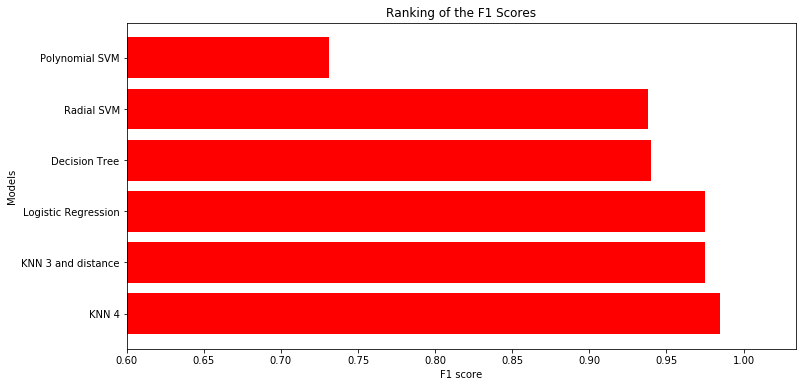

In [52]:
plt.figure(figsize=(12,6))
y_pos = np.arange(len(model_names))
plot_bar = plt.barh(y_pos,liste_of_f1_scores,align='center', color = 'red')


plt.xlim(.6)
plt.yticks(range(len(model_names)),model_names)
plt.xlabel('F1 score')
plt.ylabel('Models')
plt.title('Ranking of the F1 Scores');


For each of our models (KNN, Logistic Regression, Decision Tree Classifier and SVM), we have make out-of-sample tests with the help of cross-validation method.
Then, we have quantified the quality of these models thanks to three measures: 
- The accuracy score (between 0 and 1)
- The f1 score
- The confusion matrix
- The classification report

By ranking them by their f1 score, which represents the ability to produce correct predictions, we can first remark that all the models are pretty good at making out-of-sample predictions (except the polynomial SVM model): their f1 scores are all between 0.93 and 0.98. 
Nevertheless, our best model would be the KNN Model, with 4 neighbors and without the parameter distance.

But our results are pretty limited: in fact, it exists a lot of variations for each model, and for instance, we might have ended up with an even better model by using another kind of classifier for the SVM method, in addition to the Radial and Polynomial models used.

Finally, we have determined the features according to their regression score and scatterplots. 
The ones with the largest explanatory powers seems to be "worst concave points", "worst perimeter", "mean concave points", "worst radius" and "mean perimeter". 